## Logistics Regression

In [7]:
### Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv('https://titanic-training-data.csv')

In [9]:
df.head() 
## Sibling - Spouse
## Parent - child
## Port

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape


(891, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

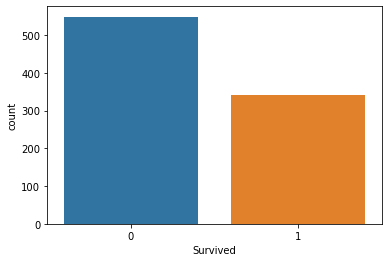

In [14]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

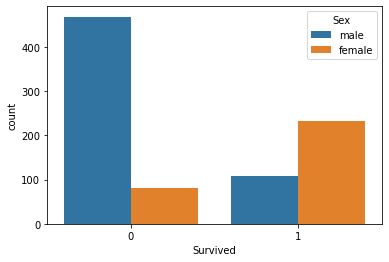

In [15]:
sns.countplot(x="Survived", hue="Sex", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

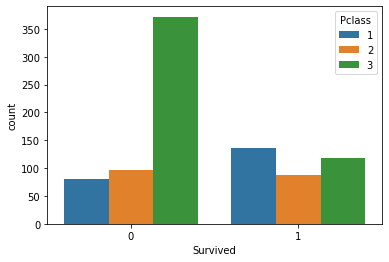

In [16]:
sns.countplot(x="Survived", hue="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

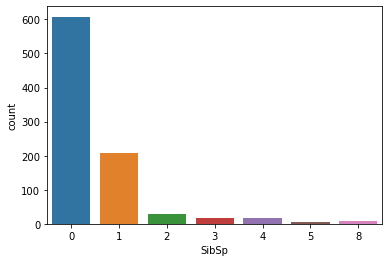

In [17]:
sns.countplot(x="SibSp", data=df)

### Data Wrangling

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

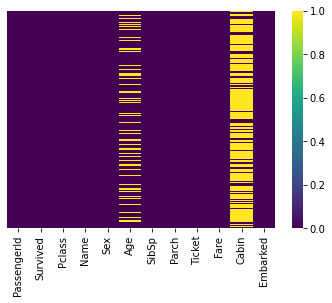

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

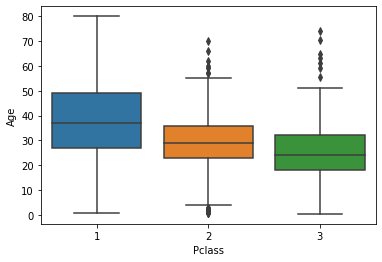

In [20]:
sns.boxplot(x="Pclass", y="Age", data=df)

In [21]:
df.drop("Cabin", axis=1, inplace=True)
## We are using inplace = true because we are not rewritting it

In [22]:
df.dropna(inplace=True)

<AxesSubplot:>

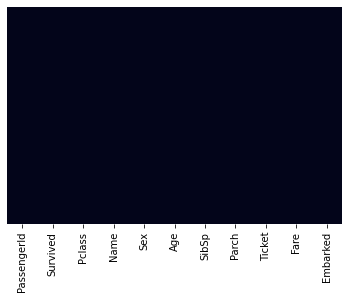

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
Sex=pd.get_dummies(df["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [26]:
Sex=pd.get_dummies(df["Sex"], drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark=pd.get_dummies(df["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
pcl=pd.get_dummies(df["Pclass"], drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [29]:
df=pd.concat([df, Sex, embark, pcl], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,1


In [30]:
df.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket", "Pclass", "Fare"], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,male,C,Q,S,2,3
0,0,22.0,1,0,1,0,0,1,0,1
1,1,38.0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,1,0,0,1,0,1


### Split the data

In [31]:
x=df.drop("Survived", axis=1)
y=df["Survived"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)

### Fit the model

In [33]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predictions=model.predict(x_test)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7897196261682243

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       122
           1       0.79      0.70      0.74        92

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[105,  17],
       [ 28,  64]], dtype=int64)

<AxesSubplot:>

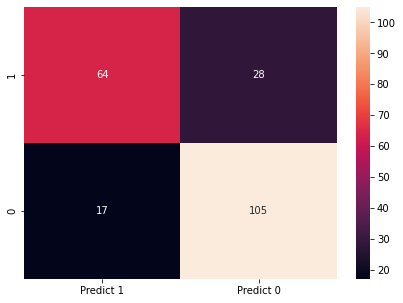

In [38]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [39]:
from sklearn import svm

In [40]:
clf = svm.SVC(gamma=0.025, C=11)

In [41]:
clf.fit(x_train, y_train)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(C=11, gamma=0.025)

In [42]:
y_pred = clf.predict(x_test)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7616822429906542

## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=42)
dTree.fit(x_train, y_train)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(random_state=42)

### Scoring our decision Tree

In [46]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9578313253012049
0.7570093457943925


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [47]:
dTree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dTree.fit(x_train, y_train)

C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9578313253012049
0.7616822429906542


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Reducing over fitting (Regularization)

In [51]:
dTreeR = DecisionTreeClassifier (criterion = 'gini', max_depth=4, random_state=42)
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9578313253012049
0.7616822429906542


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Ensemble learning - Bagging

In [53]:
bgcl = BaggingClassifier(n_estimators=50, base_estimator=dTree, random_state=42)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test, y_test))

0.7523364485981309


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Ensemble learning - AdaBoosting

In [55]:
abcl = AdaBoostClassifier(n_estimators=100, random_state=42)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)
print(abcl.score(x_test, y_test))

0.7990654205607477


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Ensemble learning - GradientBoosting

In [58]:
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))

0.7710280373831776


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Ensemble learning - RandomForest Classifier


In [60]:
rfcl = RandomForestClassifier(n_estimators=50, random_state=42, max_features=3)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))

0.780373831775701


C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Anurag Seth\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
